# Chapter 4: Testing and regularization with Turi Create

In [3]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
random.seed(0)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import utils

## Defining our dataset

Plotting the polynomial $-x^2+2$

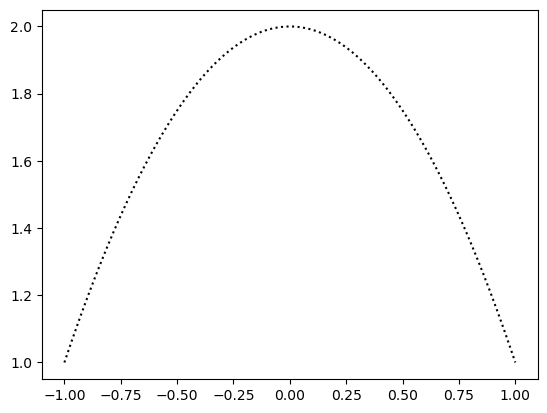

In [9]:
# Our original polynomial is -x^2+2
coefs = [2,0,-1]

def polynomial(coefs, x):
    n = len(coefs)
    return sum([coefs[i]*x**i for i in range(n)])

def draw_polynomial(coefs):
    n = len(coefs)
    x = np.linspace(-1, 1, 1000)
    #plt.ylim(0,3)
    plt.plot(x, sum([coefs[i]*x**i for i in range(n)]), linestyle=':', color='black')

draw_polynomial(coefs)

Generating a dataset of 40 points, close to this polynomial

In [24]:
X = []
Y = []
for i in range(60):
    x = random.uniform(-1,1)
    y = polynomial(coefs, x) + random.gauss(0,0.1)
    X.append(x)
    Y.append(y)

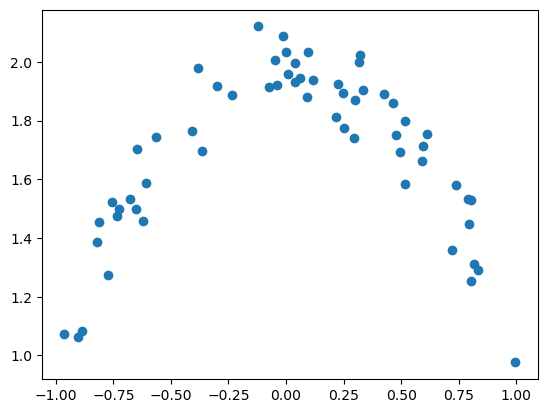

In [25]:
plt.scatter(X, Y)

## Training a polynomial regression model

Let's plot a polynomial of degree 20 to our dataset. Notice how much it overfits!

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def train_polynomial_regression(X, Y, degree, regularization=None, alpha=1.0):
    """
    Trains a polynomial regression model with optional L1 or L2 regularization.

    Args:
      X: Input features (list or numpy array).
      Y: Input labels (list or numpy array).
      degree: The degree of the polynomial.
      regularization: Type of regularization ('l1', 'l2', or None). Defaults to None.
      alpha: Regularization strength (for L1 and L2). Defaults to 1.0.

    Returns:
      A trained scikit-learn model object (LinearRegression, Ridge, or Lasso).
    """
    X = np.array(X).reshape(-1, 1)
    Y = np.array(Y)

    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    if regularization == 'L1':
        model = Lasso(alpha=alpha)
    elif regularization == 'L2':
        model = Ridge(alpha=alpha)
    else:
        model = LinearRegression()

    model.fit(X_poly, Y)

    return model

In [33]:
degree_used = 20
model = train_polynomial_regression(X, Y, degree_used)

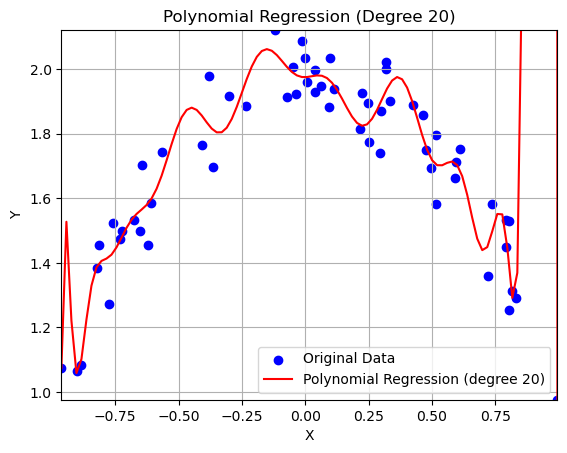

In [34]:
model = train_polynomial_regression(X, Y, degree_used)
utils.plot_polynomial_regression(model, X, Y, degree_used)

## Splitting data into training and testing

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

print("Shape of X_train:", np.shape(X_train))
print("Shape of X_test:", np.shape(X_test))
print("Shape of Y_train:", np.shape(Y_train))
print("Shape of Y_test:", np.shape(Y_test))

Shape of X_train: (48,)
Shape of X_test: (12,)
Shape of Y_train: (48,)
Shape of Y_test: (12,)


## Training a polynomial regression model with no regularization

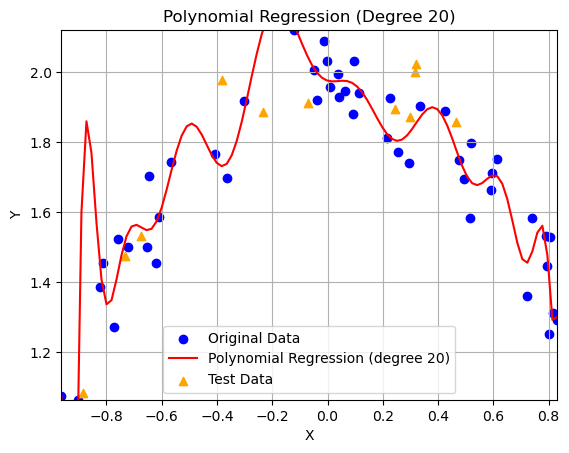

In [45]:
model_no_reg = train_polynomial_regression(X_train, Y_train, degree_used)
utils.plot_polynomial_regression(model_no_reg, X_train, Y_train, degree_used, X_test, Y_test)

In [46]:
from sklearn.metrics import mean_squared_error

def evaluate_model(model, X_test, Y_test, degree):
    """
    Evaluates a trained polynomial regression model on test data and returns the RMSE.

    Args:
      model: The trained LinearRegression model object.
      X_test: Test set features (list or numpy array).
      Y_test: Test set labels (list or numpy array).
      degree: The degree of the polynomial used for training.

    Returns:
      The Root Mean Squared Error (RMSE) on the test set.
    """
    X_test = np.array(X_test).reshape(-1, 1)
    Y_test = np.array(Y_test)

    poly = PolynomialFeatures(degree=degree)
    X_test_poly = poly.fit_transform(X_test)

    y_pred = model.predict(X_test_poly)

    rmse = np.sqrt(mean_squared_error(Y_test, y_pred))

    return rmse

In [47]:
square_loss_no_reg = evaluate_model(model_no_reg, X_test, Y_test, degree_used)
print(f"Square loss on the test set (degree {degree_used}): {square_loss_no_reg}")

Square loss on the test set (degree 20): 661.7587564822204


## Training a polynomial regression model with L1 regularization

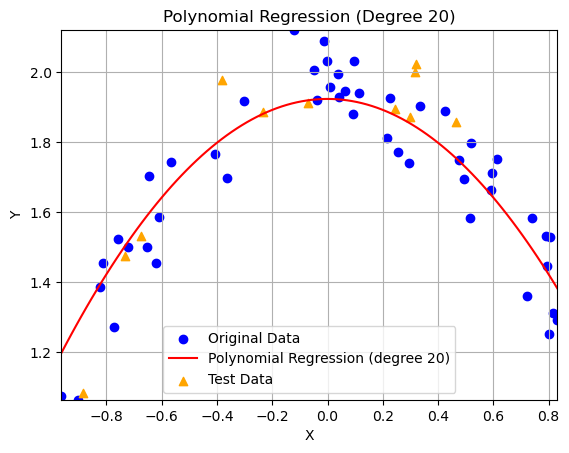

In [48]:
l1_penalty = 0.01
# Train with L1 (Lasso) regularization
model_L1_reg = train_polynomial_regression(X_train, Y_train, degree_used, 'L1', l1_penalty)
utils.plot_polynomial_regression(model_L1_reg, X_train, Y_train, degree_used, X_test, Y_test)

In [49]:
square_loss_L1_reg = evaluate_model(model_L1_reg, X_test, Y_test, degree_used)
print(f"Square loss on the test set (degree {degree_used}): {square_loss_L1_reg}")

Square loss on the test set (degree 20): 0.1221447527460632


## Training a polynomial regression model with L2 regularization

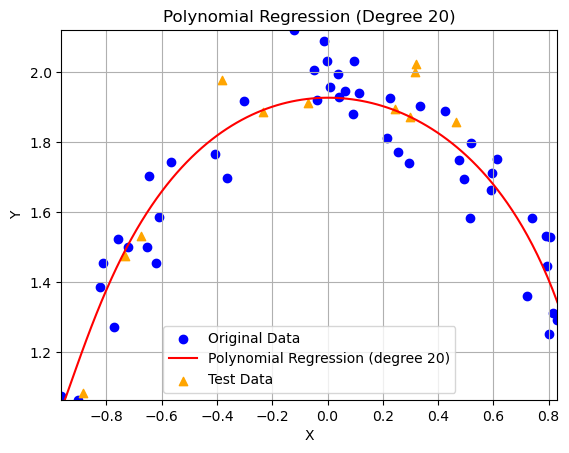

In [98]:
l2_penalty = 0.3
# Train with L2 (Ridge) regularization
model_L2_reg = train_polynomial_regression(X_train, Y_train, degree_used, 'L2', l2_penalty)
utils.plot_polynomial_regression(model_L2_reg, X_train, Y_train, degree_used, X_test, Y_test)

In [99]:
square_loss_L2_reg = evaluate_model(model_L2_reg, X_test, Y_test, degree_used)
print(f"Square loss on the test set (degree {degree_used}): {square_loss_L2_reg}")

Square loss on the test set (degree 20): 0.09894648770651265


### Exploring the coefficients of the models

In [56]:
print("Coefficients of the model with no regularization")
print(model_no_reg.intercept_)
print(model_no_reg.coef_)
print()
print("Coefficients of the model with L1 regularization")
print(model_L1_reg.intercept_)
print(model_L1_reg.coef_)
print()
print("Coefficients of the model with L2 regularization")
print(model_L2_reg.intercept_)
print(model_L2_reg.coef_)

Coefficients of the model with no regularization
1.9764940701502873
[ 0.00000000e+00 -2.37695588e-01  7.86754687e+00 -5.57955571e+01
 -2.75500164e+02  1.47584354e+03  3.17591515e+03 -1.41323376e+04
 -1.81498977e+04  6.72118845e+04  5.56688056e+04 -1.74126933e+05
 -8.40510995e+04  2.43452528e+05  1.85047660e+04 -1.56619223e+05
  1.27841580e+05  9.94895751e+03 -1.73522758e+05  2.41407834e+04
  7.21571060e+04]

Coefficients of the model with L1 regularization
1.924209449843452
[ 0.          0.         -0.78366145  0.         -0.          0.
 -0.          0.         -0.          0.         -0.          0.
 -0.          0.         -0.          0.         -0.          0.
 -0.          0.         -0.        ]

Coefficients of the model with L2 regularization
1.9635706635618437
[ 0.         -0.05987825 -0.95943109  0.29724913  0.2338501  -0.14114648
  0.0250329  -0.11961303 -0.15202529 -0.04558487 -0.21271011 -0.01105156
 -0.19593028 -0.01782775 -0.13798311 -0.05090849 -0.0630476  -0.09628114
